## CNN Notebook -- Classifying Articles of Clothing

The whole idea behind a "neural network" is to imitate how humans learn. So how do humans learn?

I'm certainly no biologist, but the high level version is that a neuron collects signals from input channels named "dendrites," processes information in its nucleus, and then generates an output in a long thin branch called an axon. Humans learn as they change the strength of the bonds between neurons. A neural network is simply the data scientist's attempt to recreate this magnificent learning mechanism mathematically.

If we think of the biological nucleus in a neuron as a summation of input values, we can begin to understand how multiplying our input values by certain weights can begin to mimic learning behavior. This _weight times input_ operation assigns variable strength to varying inputs in much the same way that the human brain bonds different neurons together more or less tightly. Oversimply stated, larger sums equate to stronger bonds. Traditional neural networks also include a bias term that can shift the summation value up or down after the weights have been applied. The summation is then filtered through what we in the business call an activation function (common ones include sigmoid (used for binary classification), softmax (common in multi-class classification), relu, etc). This activation function is the crux of deep learning. Without it, the weights and bias would simply apply a linear transformation to the inputs and our intricate network would be nothing more than a high maintenance linear regression model. 

What most people mean when they talk about a neural network is thousands of these artifical neurons, or summations, chained together. The set of these chaines is termed a hidden layer, the link between the input layer and the output layer. This is the primary architecture used to build basic to advanced networks.

Taking a step back for a moment, let's clarify what we're talking about when we say "input values." How can a neural netowrk take for example an image and generate a prediction for the type of article of clothing in the image? Networks require significantly more preprocessing of actual inputs than a human. For example, show your neighbor a photo of a city street of jeans and ask them, "Do you see a stop sign?" You're neighbor is a low budget binary classifier that will work much faster than any network on that single sample. Where the networks shine though is when you have entire buildings full of pictures of traffic settings and you need to know which ones have stop signs, and which ones don't, for all of them.


Unlike in our human-headed example, one cannot just take an image and feed it directly to a network in the same way you could hold up a picture to a human person. The pipeline from image to network input requires some legwork and goes something like this: take an image, say for example of a shoe. The shoe image undergoes a process called "convolution" (to be defined later), "pooling" (essentially downsampling), and "flattening" before it is ready to be fed into a CNN as an input. It sounds complicated, but thanks to Python's many built in libraries all of this can be accomplished using only a few lines of code which we will work through later on in this notebook. Next let's define what each of these terms means in slightly more detail.

#### Feature Detector

Convolutional neural networks (CNN's) use an image kernel to scan a given image and apply a filter to obtain a certain effect (for example, blurring, sharpening, etc). By nature they preserve the spatial relationship between pixels.

#### Feature Map

A feature maps refers to the output of a convolution (the process of running a feature detector over on an actual image). It is the new version of the actual image that was blurred, sharpened, etc depending on the specific feature detector chosen.

#### Pooling (downsampling layer)

Pooling is a common technique applied in efforts to avoid overfitting a network to the training data. At a very high level, pooling reduces the dimensionality of a feature map which improves computational efficiency while preserving the prominent features. Max pooling works by returning the maximum feature response within a given sample size in a feature map. (Min, avg pooling etc are other common methods). For example, an image that is initially 40x40 pixels might become 20x20 after applying pooling. The idea is that the figures in the images will still be identifiable, albeit slightly less clear. This forces the network to learn generalizable patterns rather than highly specific attributes characteristic of the training set.

#### Flattening

By definition the input layer of a neural network expects to be fed a vector of values (rather than a matrix or dataframe). Flattening simply converts the pooled input values into a vector that can be recognized as an input to a CNN! There's no real intuition behind why this is the case; moreso it is the nature of data science to understand what data structures are expected by which algorithms.

Now that we've covered the basic definitions we need to understand, we can start to load in some sample data and start working on building our very own CNN.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [136]:
train.shape

(60000, 785)

In [135]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here we have a training data set with 60,000 samples, which is absolutely _tiny_ to the size of your typical training data for building an industry neural net. The first column contains the correct label (0 - 9) for each of the 60k images in this data set. There are 784 pixels in each image (28 x 28), each containing a value between 0 - 255 (which represents a greyscale value for that pixel).

In [139]:
train.label.sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

A quick way to visualize some of the training samples along with the label is as follows: 

3.0

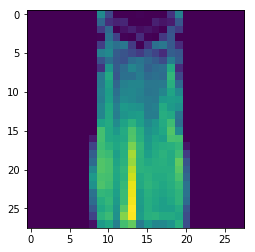

In [110]:
import random


training = np.array(train, dtype = 'float32')
testing = np.array(test, dtype = 'float32')

i = random.randint(1,60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i, 0]
label

There is more you could do to explore the dataset further, but for now let's move on to writing some code to build a preliminary neural network.

#### Training the model

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [114]:
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [115]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = .2, random_state = 12345)

In [116]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

Let's pause for a moment here to make sure we understand why we've defined a training, validation, and testing set. The importance of understanding why we have these three distinct sets cannot be overstated, and improper use of these data sets can cause seemingly "awesome" models to completely faceplant in production.

#### Overfitting and Underfitting With Machine Learning Algorithms

The cause of poor performance in machine learning is either overfitting or underfitting the data. After reading this you will discover the concept of generalization in machine learning and the problems of overfitting and underfitting that go along with it. Let's get started.

In [ ]:
#### Approximate a Target Function in Machine Lear

#### Training Data

dfsdf

#### Testing Data (Holdout)

fdkjdjflks

fjsdkjfls

Now that we understand the reason for these splits, let's get to the fun stuff and start _(finally)_ building a model

In [117]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [118]:
cnn_model = Sequential()

In [119]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

/Users/jj5jxt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [120]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [121]:
cnn_model.add(Flatten())

In [122]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

/Users/jj5jxt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [123]:
cnn_model.add(Dense(output_dim = 10, activation = 'softmax'))

/Users/jj5jxt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  """Entry point for launching an IPython kernel.


In [124]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [125]:
epochs = 50

In [126]:
cnn_model.fit(X_train, y_train,
             batch_size = 512,
             nb_epoch = epochs,
             verbose = 1, 
             validation_data = (X_validate, y_validate))

/Users/jj5jxt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 95us/step - loss: 0.7963 - acc: 0.7381 - val_loss: 0.4930 - val_acc: 0.8293
Epoch 2/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.4420 - acc: 0.8469 - val_loss: 0.4069 - val_acc: 0.8577
Epoch 3/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.3858 - acc: 0.8638 - val_loss: 0.3734 - val_acc: 0.8710
Epoch 4/50
48000/48000 [==============================] - 4s 92us/step - loss: 0.3538 - acc: 0.8767 - val_loss: 0.3423 - val_acc: 0.8842
Epoch 5/50
48000/48000 [==============================] - 4s 90us/step - loss: 0.3292 - acc: 0.8860 - val_loss: 0.3245 - val_acc: 0.8848
Epoch 6/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.3137 - acc: 0.8912 - val_loss: 0.3209 - val_acc: 0.8869
Epoch 7/50
48000/48000 [==============================] - 4s 91us/step - loss: 0.2985 - acc: 0.8964 - val_loss: 0.3084 - val_acc

#### Evaluating the Model

In [127]:
evaluation = cnn_model.evaluate(X_test, y_test)
evaluation[1]

10000/10000 [==============================] - 1s 124us/step


0.9118

The key point is during training we reached about 95% accuracy. During testing we receive 91% accuracy. 

In [128]:
predict_classes = cnn_model.predict_classes(X_test)
predict_classes

array([0, 1, 2, ..., 8, 8, 1])

Let's print a grid that will tell us here is the image with the predicted and actual labels.

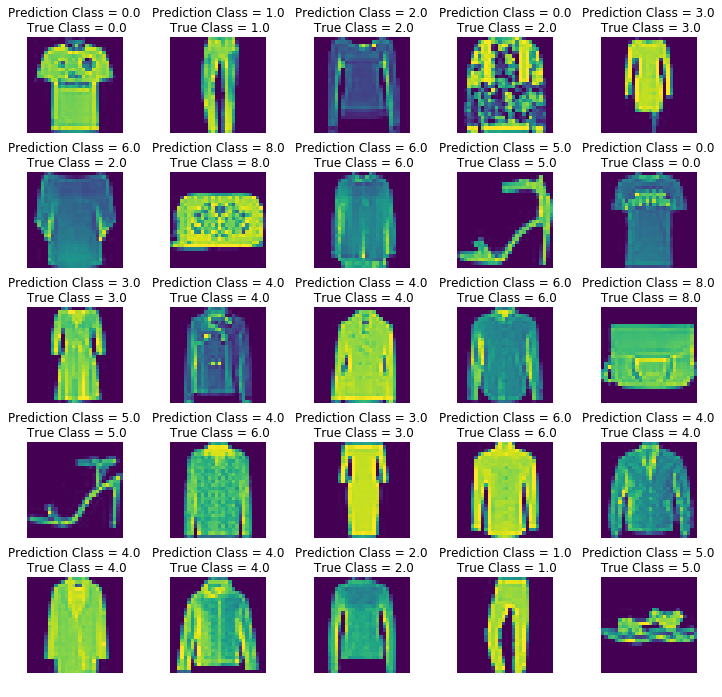

In [129]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predict_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

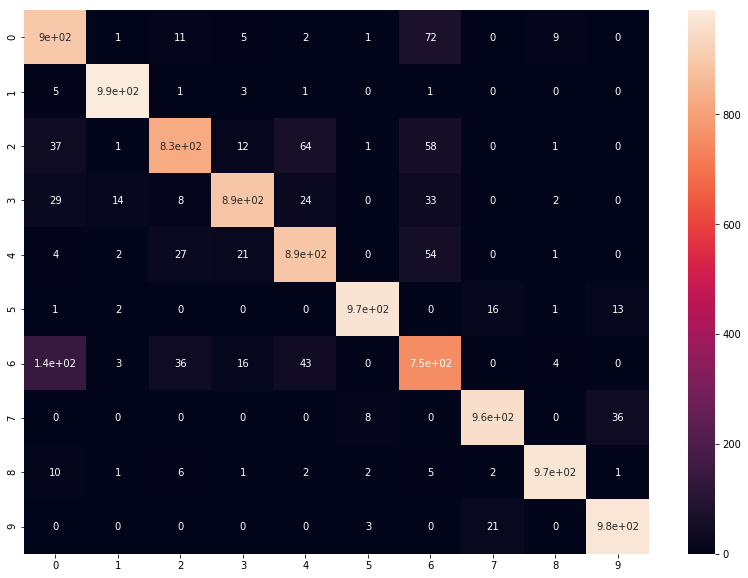

In [130]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)


Gives an overview of how many classes have been classified correctly vs incorrectly

In [131]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predict_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.90      0.84      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.90      0.83      0.86      1000
     Class 3       0.94      0.89      0.91      1000
     Class 4       0.87      0.89      0.88      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.77      0.75      0.76      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.95      0.98      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Precision and recall are interesting concepts. My preferred way to remember which is which is with this story:

Suppose you are in a room with a giant bowl full of skittles, regular m&m's, and peanut m&m's. Also suppose you have a nephew coming over who loves candy but who also is highly allergic to peanuts. You decide to build a model that can classify whether or not a given sample (or candy) is a skittle, an m&m, or a peanut m&m. 

Precision is a measure of how often the model is correct when it predicts the positive class. That is, of the times the model said "that's a peanut!", how many of those times was it actually a peanut m&m. 

Recall is a measure of _comprehensiveness_. That is, of the peanut m&m's in the bowl, how many did the model identify? A naive model could in theory say "that's a peanut" on every sample. In that case the boy-who-cried-wolfness of the model would skyrocket, but you could be sure that you would find all of the peanut m&m's. This wouldn't be super useful if you were trying to give your nephew some peanut m&ms.

A good data scientist can leverage precision and recall scores to find a model that doesn't "cheat." That is, if I try to optimize only for high precision, my model will get more conservative and my recall score will fall. If I try to optimize only for high recall, my model will devolve into a boy-who-cried-peanut and the precision score will plummet. By taking both metrics into account we obtain the f1 score, which is the harmonic mean of precision and recall. In certain cases recall can be weighted more heavily than precision or vice-versa, which may or may not make sense depending on your use case. 



#### Improving the model.

Adding dropout (regularization to avoid overfitting); expanding the size of the kernel from 32 to maybe 64; 

Dropout will typically decrease the training accuracy but marginally increase the testing accuracy. Feature engineering for texture, fabric, shape, and style variables, length, color.